# Análise Exploratória Completa do US Accidents
Este notebook apresenta uma análise detalhada das variáveis do dataset US Accidents e sua relação com a severidade dos acidentes, incluindo visualizações univariadas, bivariadas, análise temporal, correlação e demonstração de density estimation.

In [1]:
#%pip install pandas numpy matplotlib seaborn scikit-learn kagglehub
# Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.neighbors import KernelDensity
import zipfile, os
import kagglehub

# Instalação das bibliotecas necessárias


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


c:\Users\joaou\Documents\Insper\6_semestre\ML\Projeto_Final\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with zipfile.ZipFile("archive.zip", 'r') as z:
    z.extractall("data_us_accidents")
csv_file = [f for f in os.listdir("data_us_accidents") if f.endswith(".csv")][0]


In [3]:
# Leitura
df = pd.read_csv(os.path.join("data_us_accidents", csv_file), parse_dates=["Start_Time"])

## 1. Visão Geral dos Dados

In [5]:
df.shape, df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

((7728394, 46),
 None,
     ID   Source  Severity           Start_Time             End_Time  \
 0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
 1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
 2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
 3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
 4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
 
    Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
 0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
 1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
 2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
 3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
 4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   
 
   Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
 0   

## 3. Estatísticas Descritivas

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


## 4. Distribuições Univariadas de Variáveis Numéricas

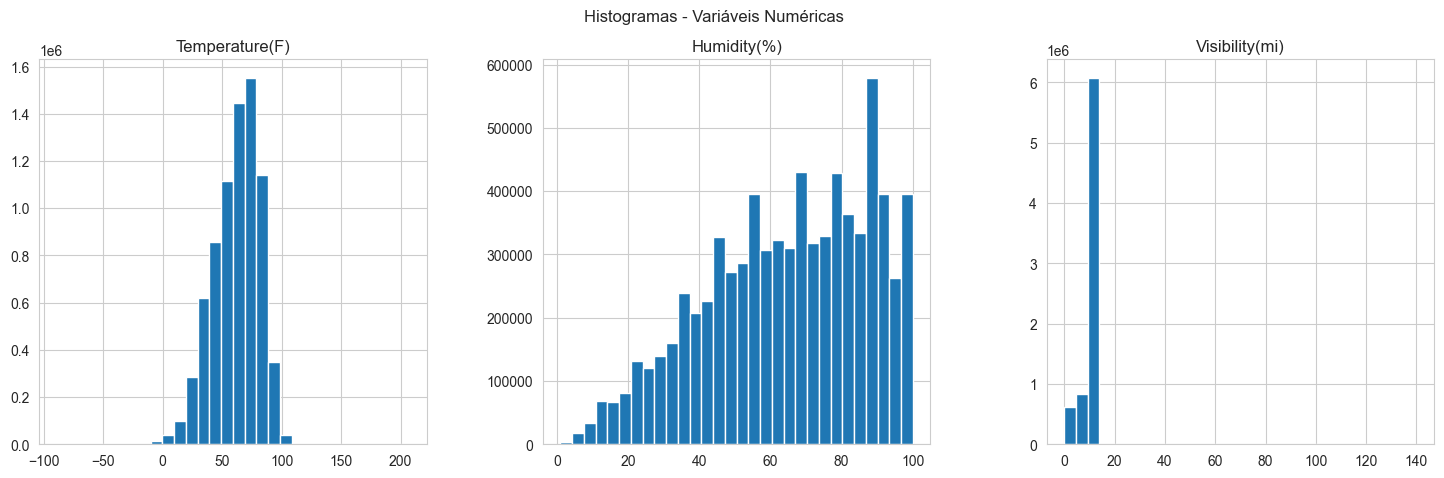

In [7]:
numeric_cols = ["Temperature(F)", "Humidity(%)", "Visibility(mi)"]
df[numeric_cols].hist(bins=30, layout=(1,3), figsize=(18,5))
plt.suptitle("Histogramas - Variáveis Numéricas")
plt.show()


## 5. Boxplots para Outliers

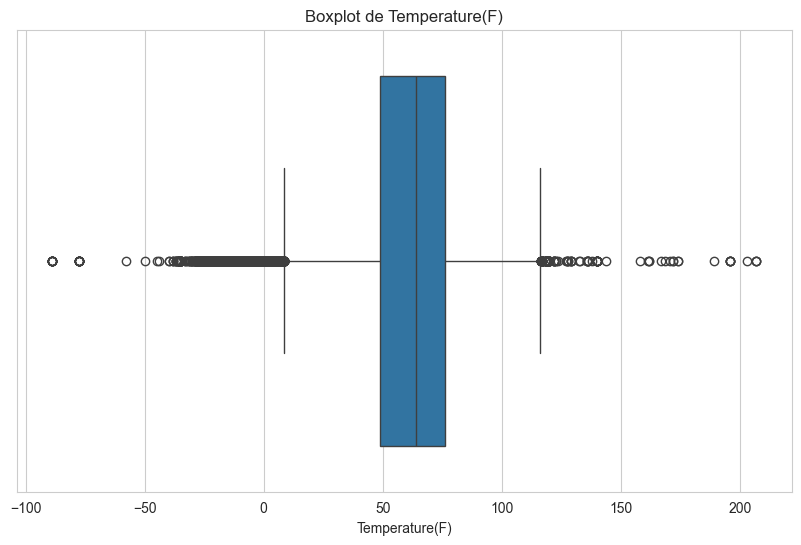

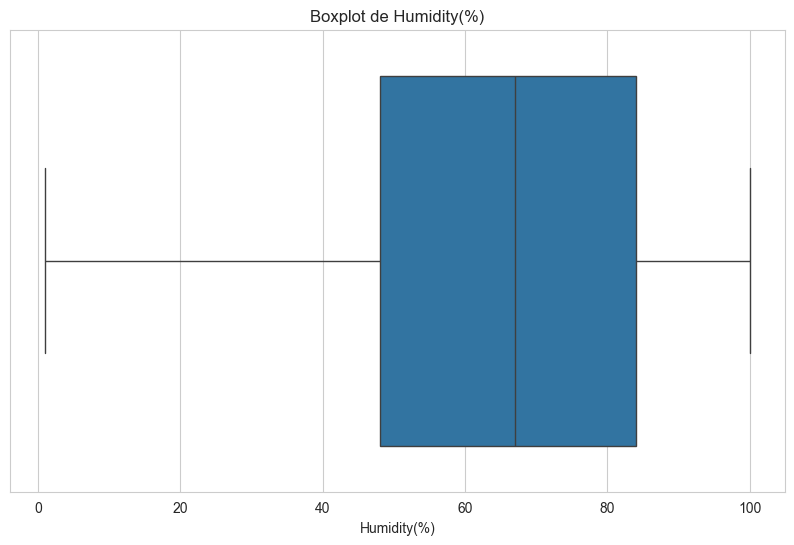

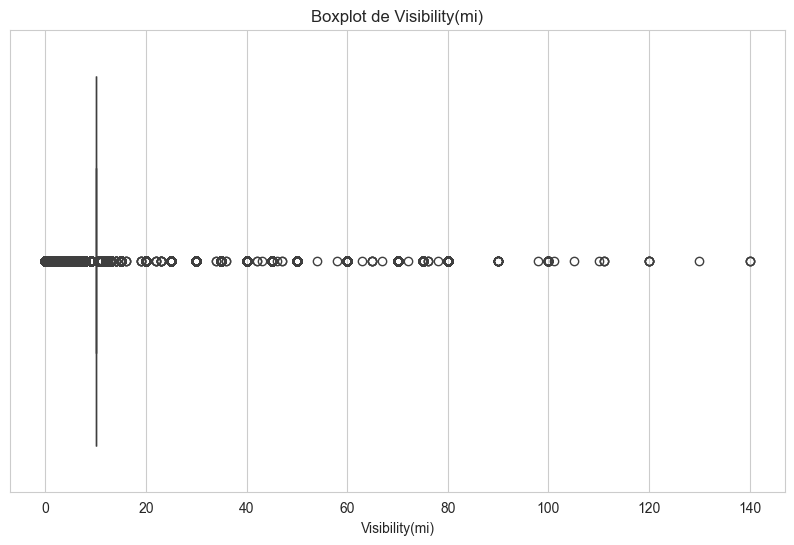

In [9]:
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


## 6. Variáveis Categóricas

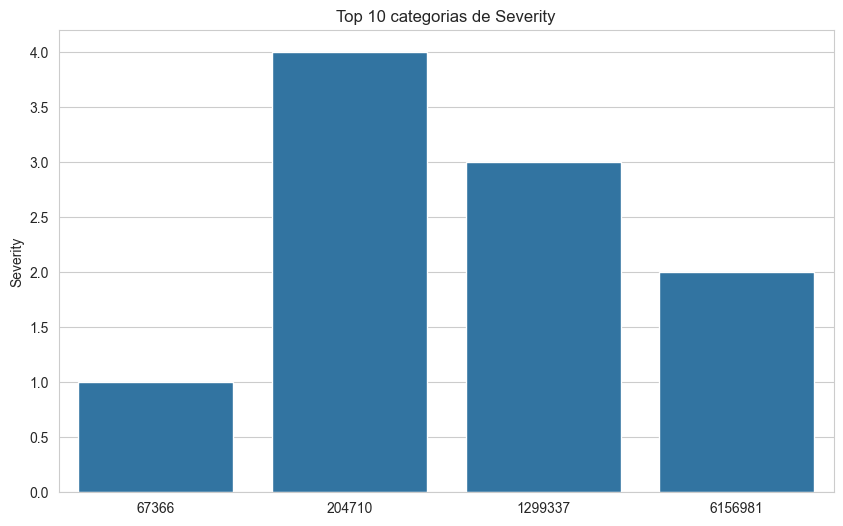

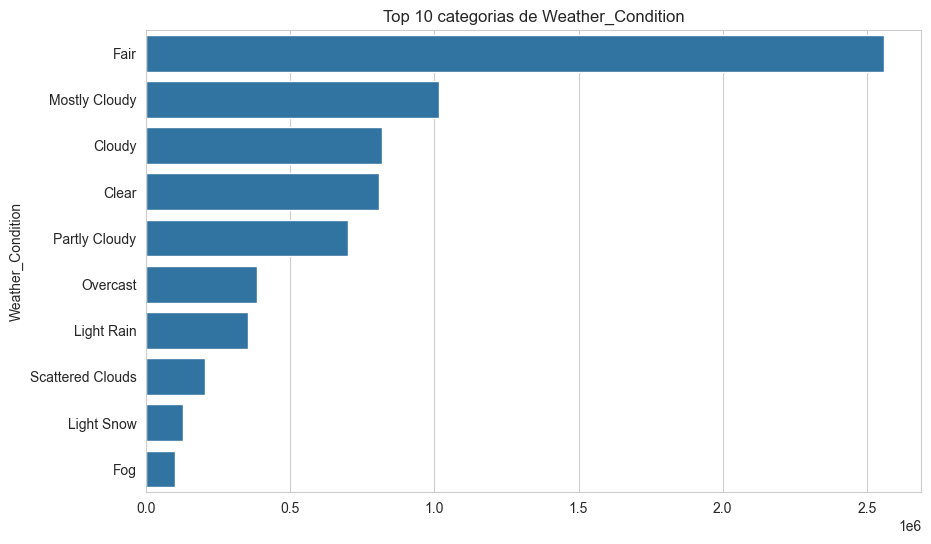

In [ ]:
categorical_cols = ["Severity", "Weather_Condition", "City", "State"]
for col in ["Weather_Condition"]:
    top = df[col].value_counts().nlargest(10)
    sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 10 categorias de {col}")
    plt.show()


## 8. Correlação entre Variáveis Numéricas

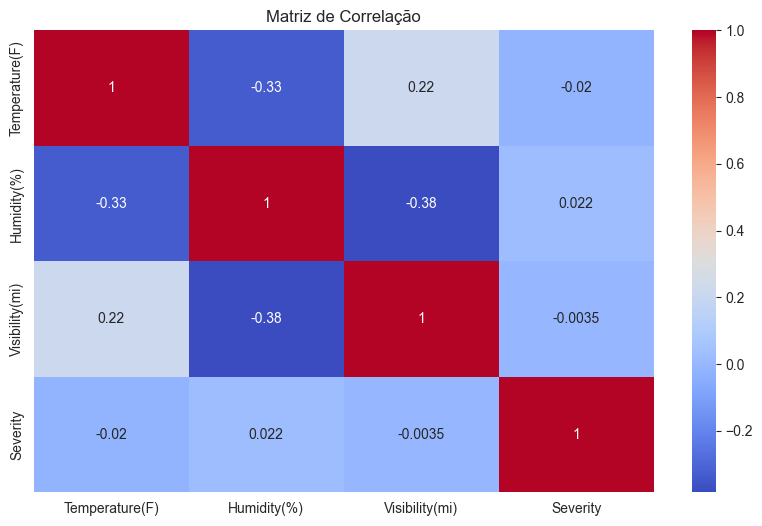

In [9]:
corr = df[numeric_cols + ['Severity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


## 9. Relação das Variáveis com Severity

In [10]:
# Média de cada numérica por nível de severidade
mean_by_sev = df.groupby('Severity')[numeric_cols].mean()
mean_by_sev

,Temperature(F),Humidity(%),Visibility(mi)
Severity,,,
1,72.417672,61.907452,9.475379
2,61.547184,64.665645,9.086604
3,62.201117,65.381389,9.092717
4,58.141514,67.301981,9.060768


### Gráfico de Linhas - Médias por Severidade

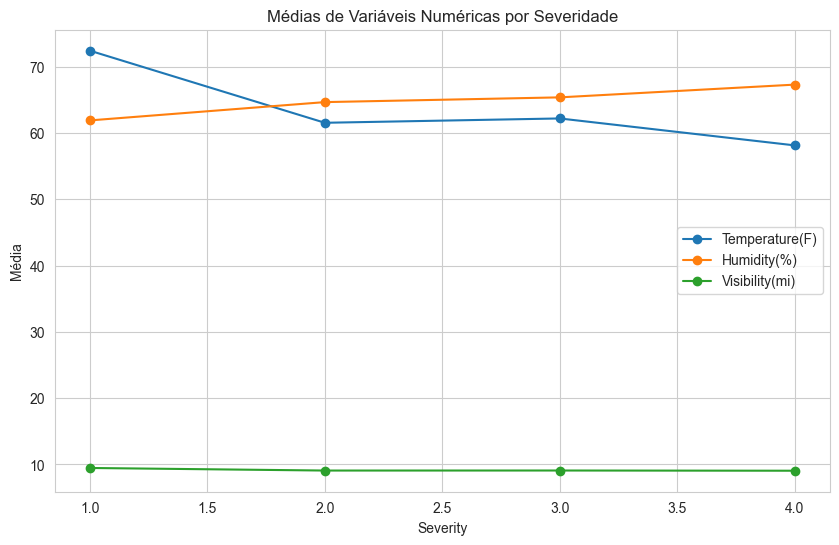

In [11]:
mean_by_sev.plot(marker='o')
plt.title("Médias de Variáveis Numéricas por Severidade")
plt.xlabel("Severity")
plt.ylabel("Média")
plt.show()


## 10. Estimação de Densidade (make_moons)

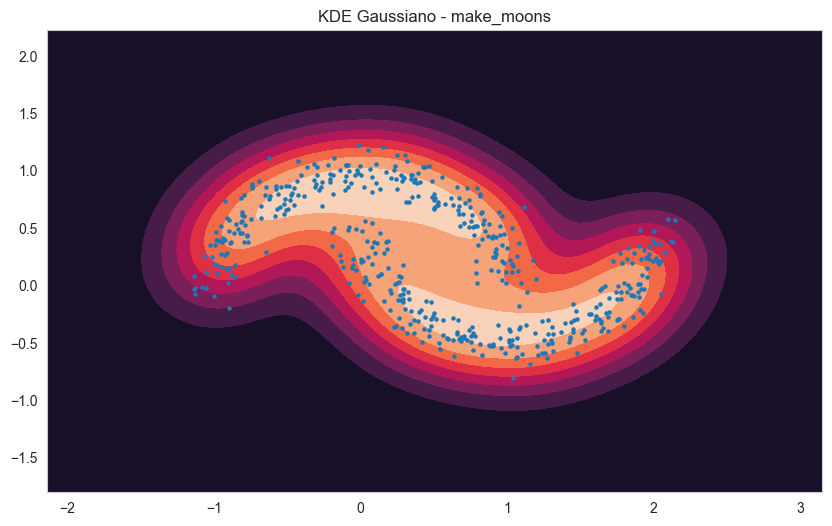

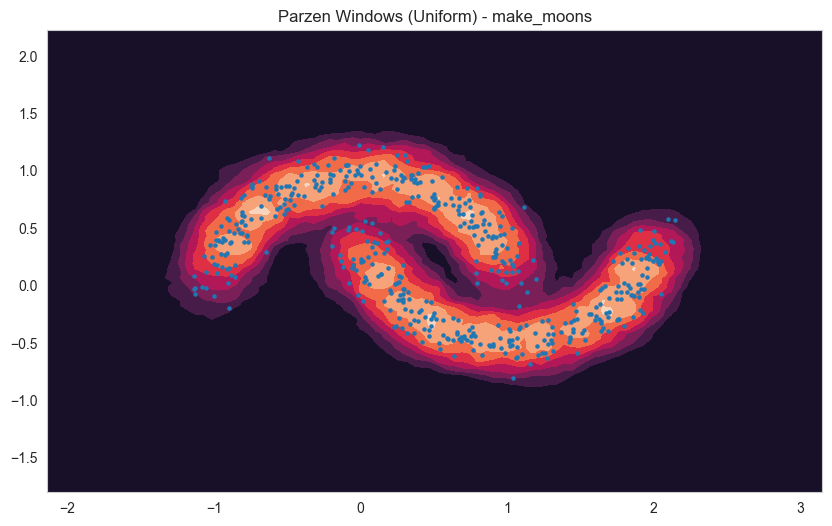

In [ ]:
# Dataset de exemplo
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
kde_gauss = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(X)
kde_uniform = KernelDensity(kernel='tophat', bandwidth=0.3).fit(X)

# Grid para visualização
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot KDE
plt.contourf(xx, yy, np.exp(kde_gauss.score_samples(grid)).reshape(xx.shape))
plt.scatter(X[:,0], X[:,1], s=5)
plt.title("KDE Gaussiano - make_moons")
plt.show()

plt.contourf(xx, yy, np.exp(kde_uniform.score_samples(grid)).reshape(xx.shape))
plt.scatter(X[:,0], X[:,1], s=5)
plt.title("Parzen Windows (Uniform) - make_moons")
plt.show()


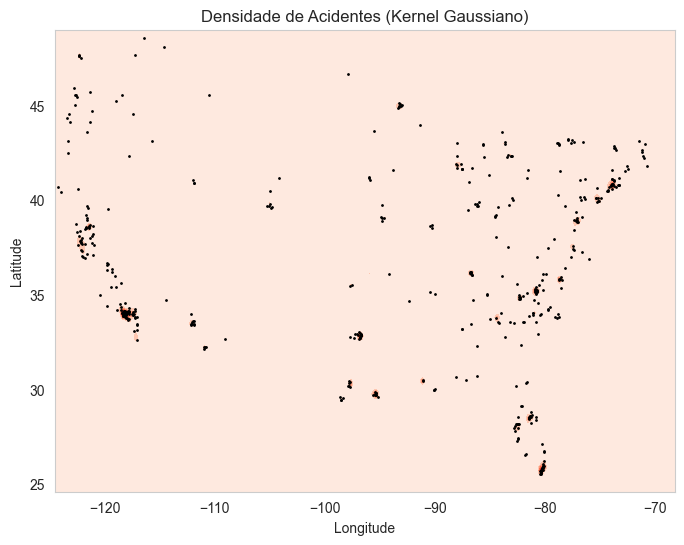

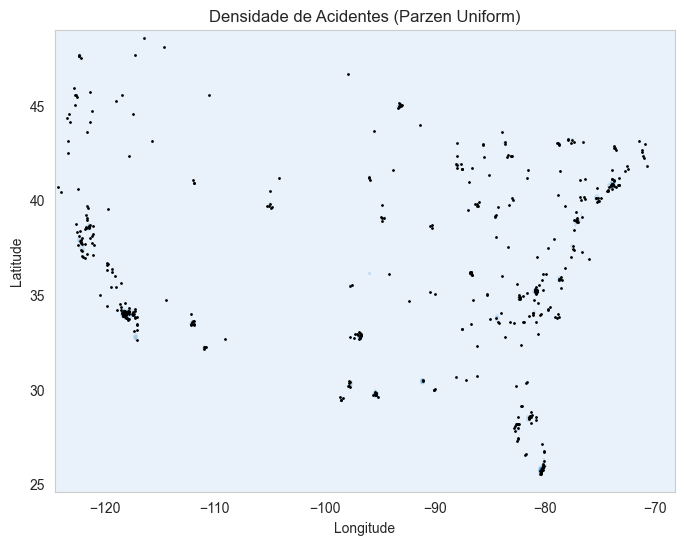

Top 10 hotspots (lat, lng):
 [[  40.78302641  -73.88605061]
 [  25.82846382  -80.39410946]
 [  32.81543159  -96.80573612]
 [  34.16379379 -118.31062623]
 [  29.75097204  -95.39094072]
 [  25.70588544  -80.39410946]
 [  33.91863703 -118.02766715]
 [  34.04121541 -118.02766715]
 [  33.91863703 -118.31062623]
 [  34.04121541 -118.31062623]]

Top 10 coldspots (lat, lng):
 [[  31.95738291 -124.535726  ]
 [  30.97675586 -124.535726  ]
 [  31.09933424 -124.535726  ]
 [  31.22191262 -124.535726  ]
 [  31.34449101 -124.535726  ]
 [  31.46706939 -124.535726  ]
 [  31.58964777 -124.535726  ]
 [  31.71222615 -124.535726  ]
 [  29.87355042 -124.535726  ]
 [  29.9961288  -124.535726  ]]


In [ ]:
# Extração de coordenadas e drop de nulos
df = df.sample(n=100000, random_state=42).reset_index(drop=True)
coords = df[['Start_Lat', 'Start_Lng']].dropna().values
# Ajuste dos estimadores espaciais
kde_spatial_gauss   = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(coords)
kde_spatial_uniform = KernelDensity(kernel='tophat',   bandwidth=0.1).fit(coords)

# Definição de grid espacial
lat_min, lat_max = coords[:,0].min(), coords[:,0].max()
lng_min, lng_max = coords[:,1].min(), coords[:,1].max()
lat_lin = np.linspace(lat_min, lat_max, 200)
lng_lin = np.linspace(lng_min, lng_max, 200)
lat_grid, lng_grid = np.meshgrid(lat_lin, lng_lin)
grid_coords = np.vstack([lat_grid.ravel(), lng_grid.ravel()]).T

# Avaliação da densidade
log_dens_sp_gauss   = kde_spatial_gauss.score_samples(grid_coords)
log_dens_sp_uniform = kde_spatial_uniform.score_samples(grid_coords)

# Plot Gaussiano
plt.figure(figsize=(8,6))
plt.contourf(lng_grid, lat_grid, np.exp(log_dens_sp_gauss).reshape(lat_grid.shape), cmap='Reds')
plt.scatter(coords[::200,1], coords[::200,0], s=1, c='k')
plt.title('Densidade de Acidentes (Kernel Gaussiano)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot Uniforme
plt.figure(figsize=(8,6))
plt.contourf(lng_grid, lat_grid, np.exp(log_dens_sp_uniform).reshape(lat_grid.shape), cmap='Blues')
plt.scatter(coords[::200,1], coords[::200,0], s=1, c='k')
plt.title('Densidade de Acidentes (Parzen Uniform)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# %% [markdown]
## 5. Identificação de Regiões de Maior e Menor Ocorrência
"""
Extraímos os pontos de maior e menor densidade para investigar fatores associados.
"""
# %%
# Valores de densidade
dens_vals = np.exp(log_dens_sp_gauss)

# Top 10 hotspots
top_idxs = np.argsort(dens_vals)[-10:]
top_coords = grid_coords[top_idxs]
print("Top 10 hotspots (lat, lng):\n", top_coords)

# 10 menores densidades (regiões raras)
bottom_idxs = np.argsort(dens_vals)[:10]
bottom_coords = grid_coords[bottom_idxs]
print("\nTop 10 coldspots (lat, lng):\n", bottom_coords)




In [4]:
#np.random.seed(42)
df = df.sample(n=100000, random_state=42).reset_index(drop=True)

# 2. Preparação do Grid Espacial
data = df[['Start_Lat', 'Start_Lng']].dropna().values
lat_min, lat_max = data[:,0].min(), data[:,0].max()
lng_min, lng_max = data[:,1].min(), data[:,1].max()
lat_lin = np.linspace(lat_min, lat_max, 200)
lng_lin = np.linspace(lng_min, lng_max, 200)
lat_grid, lng_grid = np.meshgrid(lat_lin, lng_lin)
grid = np.vstack([lat_grid.ravel(), lng_grid.ravel()]).T

# 3. Função para plotar densidade por severity

def plot_sev(severity, cmap):
    subset = df[df.Severity == severity][['Start_Lat','Start_Lng']].dropna().values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(subset)
    log_d = kde.score_samples(grid)
    dens = np.exp(log_d).reshape(lat_grid.shape)
    plt.contourf(lng_grid, lat_grid, dens, cmap=cmap, norm=Normalize())
    plt.scatter(subset[::100,1], subset[::100,0], s=1, c='k', alpha=0.3)
    plt.title(f'Severity {severity}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# 4. Plot dos 4 níveis de severity
plot_sev(1, 'Reds')
plot_sev(2, 'Oranges')
plot_sev(3, 'Greens')
plot_sev(4, 'Purples')

# 5. Atribuição de densidades ao DataFrame
all_kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data)
df['dens_all'] = np.exp(all_kde.score_samples(df[['Start_Lat','Start_Lng']].fillna(0).values))
for sev in [1,2,3,4]:
    coords = df[df.Severity == sev][['Start_Lat','Start_Lng']].dropna().values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(coords)
    col = f'dens_s{sev}'
    df.loc[df.Severity == sev, col] = np.exp(kde.score_samples(df[df.Severity == sev][['Start_Lat','Start_Lng']].values))

# 6. Exemplo de consulta de um registro
idx = 100
rec = df.loc[idx]
print(rec[['Start_Lat','Start_Lng','Severity','dens_all','dens_s1','dens_s2','dens_s3','dens_s4','Temperature(F)','Visibility(mi)']])

# 7. Preparação para modelagem
features = ['dens_all','dens_s1','dens_s2','dens_s3','dens_s4','Temperature(F)','Humidity(%)','Visibility(mi)']
X = df[features].fillna(0)
y = (df.Severity >= 3).astype(int)

NameError: name 'Normalize' is not defined